# Random forest classifier: diabetes prediction

Absolutely minimal MVP (minimum viable product) solution.

## 1. Data acquisition

In [2]:
import pandas as pd

# Load the data from the URL
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

data_df_copy = data_df

### 1.2. Train-test split

In [3]:
from sklearn.model_selection import train_test_split

# Separate features from labels
labels=data_df['Outcome']
features=data_df.drop('Outcome', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.2,
    random_state=315
)

## 2. EDA

### 2.1. Features

In [3]:
# Inspect the training features' data types
training_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 765 to 611
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


All of the features are already numeric - we don't need to do anything for the model to run. Let's check the labels too.

### 2.2. Labels

In [4]:
training_labels.info()

<class 'pandas.core.series.Series'>
Index: 614 entries, 765 to 611
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


In [5]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Run cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedShuffleSplit
import numpy as np

# Set random seed for notebook
random_seed=42

# Set train-test split fraction
testing_fraction=0.33

# Cross-validation method
cv_method=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=random_seed)
#cv_method=StratifiedShuffleSplit(n_splits=100, test_size=0.5, random_state=random_seed)

# Class weighting for decision trees
class_weights=None

# Run cross-validation
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments={'Baseline': scores * 100}

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


In [8]:
# Check for / drop duplicates
print(f"Dimensions before dropping duplicates: {data_df.shape}")
data_df = data_df.drop_duplicates().reset_index(drop = True)
print(f"Dimensions after dropping duplicates: {data_df.shape}")

Dimensions before dropping duplicates: (768, 9)
Dimensions after dropping duplicates: (768, 9)


In [9]:
# Check columns for missing data
missing_data = (data_df == 0).sum()
missing_data

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
# Impute 0 values to the mean for desired columns
import numpy as np

missing_data_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_df[missing_data_features] = data_df[missing_data_features].replace(0, np.nan)
data_df[missing_data_features] = data_df[missing_data_features].fillna(data_df[missing_data_features].mean())
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# Run cross-validation after removing duplicates and imputing values (original cross-validation accuracy: 76.1 +/- 3.2%)
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


In [12]:
# No cross-validation improvement, try scikit-learn imputer
from utils import impute 

iterative_imputed_training_features, imp, qt=impute(training_features, missing_data_features)

[IterativeImputer] Completing matrix with shape (614, 8)
[IterativeImputer] Completing matrix with shape (614, 8)


In [13]:
# Run cross-validation after using scikit-learn imputer (original cross-validation accuracy: 76.1 +/- 3.2%)
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


Have 8 features for plot:
 0: Pregnancies
 1: Glucose
 2: BloodPressure
 3: SkinThickness
 4: Insulin
 5: BMI
 6: DiabetesPedigreeFunction
 7: Age


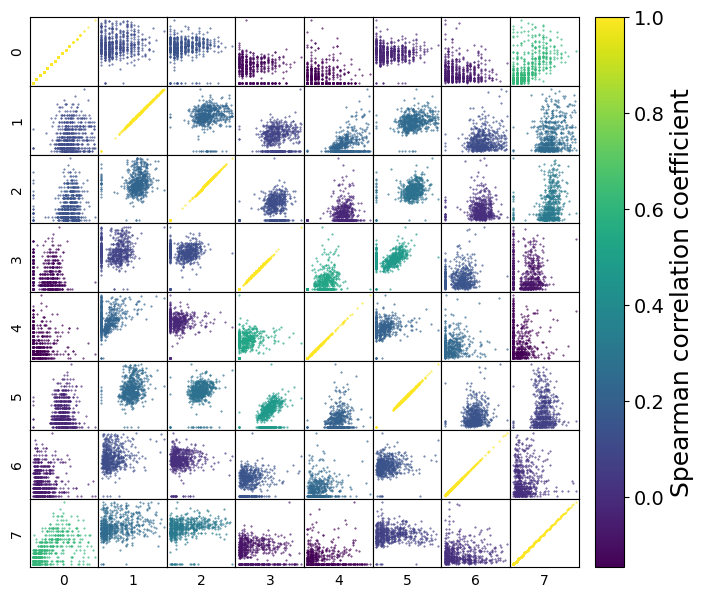

In [37]:
from utils import plot_scatter_matrix

plot_scatter_matrix(training_features).show()

In [ ]:
# Investigate SkinThickness and BMI
skin_thickness = len(data_df_copy[data_df_copy['SkinThickness'] == 0])
print(f'Have {skin_thickness} people with a skin thickness of 0')

bmi = len(data_df_copy[data_df_copy['BMI'] == 0])
print(f'Have {bmi} people with a BMI of 0')

Have 227 people with a skin thickness of 0
Have 11 people with a BMI of 0


In [ ]:
# Drop rows where SkinThickness is 0
data_df_copy.drop(data_df_copy[data_df_copy['SkinThickness'] == 0].index, inplace = True)
skin_thickness = len(data_df_copy[data_df_copy['SkinThickness'] == 0])
print(f'Have {skin_thickness} people with a skin thickness of 0')

Have 0 people with a skin thickness of 0


In [ ]:
# Run cross-validation after dropping rows with 0 value for skin thickness (original cross-validation accuracy: 76.1 +/- 3.2%)
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


In [5]:
# Investigate Insulin and BMI
insulin = len(data_df_copy[data_df_copy['Insulin'] == 0])
print(f'Have {insulin} people with a insulin of 0')

bmi = len(data_df_copy[data_df_copy['BMI'] == 0])
print(f'Have {bmi} people with a BMI of 0')

Have 374 people with a insulin of 0
Have 11 people with a BMI of 0


In [6]:
# Drop rows where Insulin is 0
data_df_copy.drop(data_df_copy[data_df_copy['Insulin'] == 0].index, inplace = True)
insulin = len(data_df_copy[data_df_copy['Insulin'] == 0])
print(f'Have {insulin} people with a insulin of 0')

Have 0 people with a insulin of 0


In [9]:
# Run cross-validation after dropping rows with 0 value for insulin (original cross-validation accuracy: 76.1 +/- 3.2%)
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


In [10]:
# Drop rows where BMI is 0
data_df_copy.drop(data_df_copy[data_df_copy['BMI'] == 0].index, inplace = True)
bmi = len(data_df_copy[data_df_copy['BMI'] == 0])
print(f'Have {bmi} people with a BMI of 0')

Have 0 people with a BMI of 0


In [11]:
# Run cross-validation after dropping rows with 0 value for BMI (original cross-validation accuracy: 76.1 +/- 3.2%)
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


In [12]:
# Drop rows where BloodPressure is 0
data_df_copy.drop(data_df_copy[data_df_copy['BloodPressure'] == 0].index, inplace = True)
blood_pressure = len(data_df_copy[data_df_copy['BloodPressure'] == 0])
print(f'Have {blood_pressure} people with a blood pressure of 0')

Have 0 people with a blood pressure of 0


In [13]:
# Run cross-validation after dropping rows with 0 value for BMI (original cross-validation accuracy: 76.1 +/- 3.2%)
scores=cross_val_score(
    RandomForestClassifier(random_state=random_seed, class_weight=class_weights),
    training_features,
    training_labels,
    cv=cv_method,
    n_jobs=-1,
    scoring='accuracy'
)

# Collect the scores so we can plot and compare later
experiments['Simple imputation']=scores * 100

print(f'Cross-validation accuracy: {(np.mean(scores) * 100):.1f} +/- {(scores.std() * 100):.1f}%')

Cross-validation accuracy: 76.1 +/- 3.2%


Also, already numeric - we can move right to training the model and setting a baseline performance result.

## 3. Training

In [1]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train decision tree classifier
model=RandomForestClassifier(random_state=315)
fit_result=model.fit(training_features, training_labels)

NameError: name 'training_features' is not defined

## 4. Evaluation

In [15]:
from sklearn.metrics import accuracy_score

# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 77.9% accurate on the test data


Ok, done! Absolutely minimal random forest classifier using ~10 statements. Out of the box, the random forest performs slightly better than a single decision tree classifier. But, there are still many things we could do to try and improve it.

In [34]:
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

hyperparams = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

# Train the model
grid.fit(training_features, training_labels)

# Get the best parameters
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
model = RandomForestClassifier(max_depth = None, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 100, random_state = 42)
model.fit(training_features, training_labels)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [36]:
# Make predictions from test set features
predicted_labels=model.predict(testing_features)

# Score predictions from accuracy (original accuracy: 77.9%)
percent_accuracy=accuracy_score(testing_labels, predicted_labels) * 100
print(f'Model is {percent_accuracy:.1f}% accurate on the test data')

Model is 77.3% accurate on the test data
